In [1]:
import numpy as np

x=2*np.random.rand(100,1)
y=4+3*x+np.random.randn(100,1)

In [2]:
x_b=np.c_[np.ones((100,1)),x]
thetabest=np.linalg.inv(x_b.T.dot(x_b)).dot(x_b.T).dot(y)

In [3]:
thetabest

array([[4.0722611 ],
       [2.79583173]])

In [4]:
xnew=np.array([[0],[2]])
xnewb=np.c_[np.ones((2,1)),xnew]
ypredict=xnewb.dot(thetabest)
ypredict

array([[4.0722611 ],
       [9.66392456]])

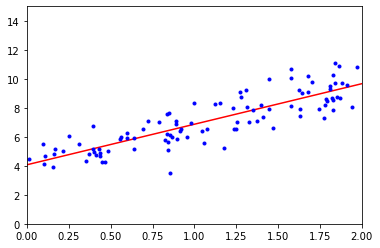

In [15]:
import matplotlib.pyplot as plt
plt.plot(xnew,ypredict,"r-")
plt.plot(x,y,"b.")
plt.axis([0,2,0,15])
plt.show()

In [16]:
from sklearn.linear_model import LinearRegression

linreg=LinearRegression()
linreg.fit(x,y)

LinearRegression()

In [18]:
linreg.intercept_,linreg.coef_

(array([4.0722611]), array([[2.79583173]]))

In [19]:
linreg.predict(xnew)

array([[4.0722611 ],
       [9.66392456]])

In [20]:
thetabestsvd,residuals,rank,s=np.linalg.lstsq(x_b,y,rcond=1e-6)
thetabestsvd

array([[4.0722611 ],
       [2.79583173]])

In [21]:
np.linalg.pinv(x_b).dot(y)

array([[4.0722611 ],
       [2.79583173]])

In [31]:
eta=0.1
niterations=1000
m=100

theta=np.random.randn(2,1)
for iteration in range(niterations):
    gradiants=2/m * x_b.T.dot(x_b.dot(theta)-y)
    theta=theta-eta*gradiants
theta   

array([[4.0722611 ],
       [2.79583173]])

In [37]:
nepochs=50
t0,t1=5,50

def learningschedule(t):
    return t0/(t+t1)
theta=np.random.randn(2,1)

for epoch in range(nepochs):
    for i in range(m):
        randomindex=np.random.randint(m)
        xi=x_b[randomindex:randomindex+1]
        yi=y[randomindex:randomindex+1]
        
        gradients=2*xi.T.dot(xi.dot(theta)-yi)
        eta=learningschedule(epoch*m+i)
        theta=theta-eta*gradients
m

100

In [34]:
theta

array([[4.09252822],
       [2.77440078]])

In [39]:
from sklearn.linear_model import SGDRegressor

sgdreg=SGDRegressor(max_iter=1000,tol=1e-3,eta0=0.1,penalty=None)
sgdreg.fit(x,y.ravel())

SGDRegressor(eta0=0.1, penalty=None)

In [40]:
sgdreg.intercept_,sgdreg.coef_

(array([4.10457368]), array([2.8494497]))

In [41]:
m=100
x=6*np.random.rand(m,1)-3
y=0.5*x**2+x+2+np.random.randn(m,1)

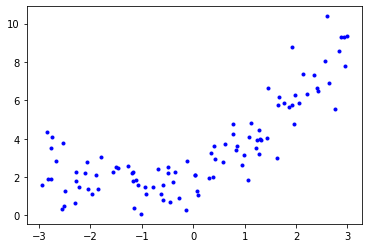

In [43]:
plt.plot(x,y,'b.')
plt.show()

In [44]:
from sklearn.preprocessing import PolynomialFeatures
poly=PolynomialFeatures(degree=2,include_bias=False)
xpoly=poly.fit_transform(x)


In [45]:
x[0]

array([2.13356691])

In [46]:
xpoly[0]

array([2.13356691, 4.55210774])

In [51]:
linreg=LinearRegression()
linreg.fit(xpoly,y)
linreg.intercept_,linreg.coef_

(array([2.16689072]), array([[1.05016683, 0.42644809]]))

In [57]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plotcurves(model,x,y):
    xtrain,xval,ytrain,yval=train_test_split(x,y,test_size=0.2)
    trainerrors,valerrors=[],[]
    for m in range (1,len(xtrain)):
        model.fit(xtrain[:m],ytrain[:m])
        ytrainpredict=model.predict(xtrain[:m])
        yvalpredict=model.predict(xval)
        trainerrors.append(mean_squared_error(ytrain[:m],ytrainpredict))
        valerrors.append(mean_squared_error(yval,yvalpredict))
    plt.plot(np.sqrt(trainerrors),"r-+",linewidth=2)
    plt.plot(np.sqrt(valerrors),'b-',linewidth=3)

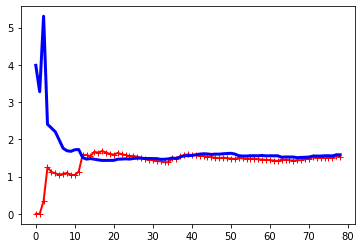

In [58]:
linreg=LinearRegression()
plotcurves(linreg,x,y)

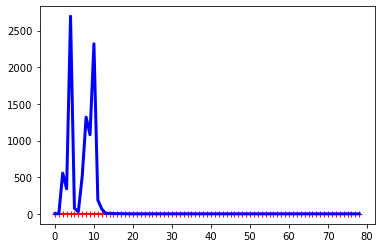

In [59]:
from sklearn.pipeline import Pipeline

polyregression=Pipeline([
    ('poly',PolynomialFeatures(degree=10,include_bias=False)),
    ("lin",LinearRegression())
])
plotcurves(polyregression,x,y)

In [60]:
from sklearn.linear_model import Ridge
ridgereg=Ridge(alpha=1,solver='cholesky')
ridgereg.fit(x,y)
ridgereg.predict([[1.5]])

array([[5.02770113]])

In [64]:
sgdreg=SGDRegressor(penalty="l2")
sgdreg.fit(x,y.ravel())
sgdreg.predict([[1.5]])

array([5.00157178])

In [65]:
from sklearn.linear_model import Lasso

lassoreg=Lasso(alpha=0.1)
lassoreg.fit(x,y)
lassoreg.predict([[1.5]])

array([4.98456192])

In [66]:
from sklearn.linear_model import ElasticNet

elastic=ElasticNet(alpha=0.1,l1_ratio=0.5)
elastic.fit(x,y)
elastic.predict([[1.5]])

array([4.98429166])

In [ ]:
from sklearn.base import clone